In [168]:
# cd C:\Users\mpoli\Desktop\Git\Deeplearning\Pandas_data_analysis
# jupyter nbconvert --to script wine.ipynb

import urllib.request as req # 웹에서 다운로드 할 때
import matplotlib.pyplot as plt # 그래프
from sklearn.cluster import KMeans # K-평균 알고리즘
from sklearn.preprocessing import StandardScaler # 데이터 Nomalization
from sklearn.manifold import TSNE
import pandas as pd
import os 

In [169]:
DOWNLOAD_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
DATA_PATH = os.path.join('data') # 데이터 저장 폴더
ColumnList = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'] # wine 성분 데이터 ColumnList

In [170]:
def fetch_wine_data(): # data 폴더와 wine의 데이터 csv 파일 생성
    if not os.path.isdir(DATA_PATH):
        os.makedirs(DATA_PATH)
    csv_path = os.path.join(DATA_PATH,'wine.csv')
    if not os.path.isfile(csv_path):
        req.urlretrieve(DOWNLOAD_ROOT, csv_path)

def load_wine_data(): # wine data의 csv파일을 return하는 함수
    csv_path = os.path.join(DATA_PATH,'wine.csv')
    return pd.read_csv(csv_path, names=ColumnList)

In [171]:
fetch_wine_data()
wine = load_wine_data()
feature = wine.iloc[:,1:]
feature

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [172]:
model = TSNE()
transformed = model.fit_transform(feature)
result = pd.DataFrame(transformed, columns=['x','y'])
new_wine = pd.concat([result, wine['Class']], axis=1)
new_wine

,x,y,Class
0,6.305212,7.398840,1
1,6.574814,6.659297,1
2,8.194910,8.696045,1
3,10.134165,10.880272,1
4,0.819517,0.337009,1
...,...,...,...
173,0.479101,0.582940,3
174,0.792036,0.894900,3
175,2.713642,2.755886,3
176,2.597164,3.063194,3


In [173]:
model = KMeans(n_clusters=3, algorithm='auto') # 3개를 cluster 데이터로 군집화 할 것
model.fit(result)
predict = pd.DataFrame(model.predict(result)) #feature에 대한 clustering value DataFrame
predict.columns=['predict']

r = pd.concat([result,predict],axis=1) # 두 DataFrame을 합침
r

,x,y,predict
0,6.305212,7.398840,1
1,6.574814,6.659297,1
2,8.194910,8.696045,1
3,10.134165,10.880272,1
4,0.819517,0.337009,2
...,...,...,...
173,0.479101,0.582940,2
174,0.792036,0.894900,2
175,2.713642,2.755886,1
176,2.597164,3.063194,1


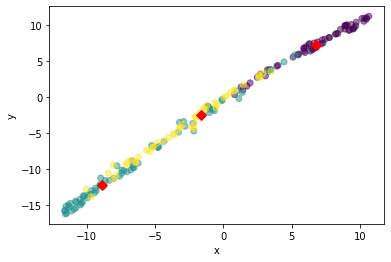

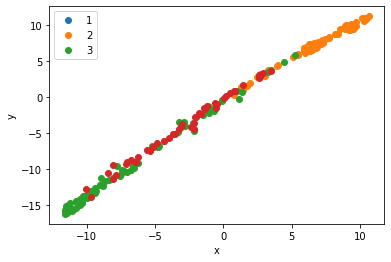

In [174]:
plt.scatter(new_wine['x'],new_wine['y'],c=new_wine['Class'],alpha=0.5)
centers = pd.DataFrame(model.cluster_centers_,columns=['x','y'])
center_x = centers['x']
center_y = centers['y']
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

for i in range (0,4,1):
    wineList = new_wine[new_wine['Class']==i]
    plt.plot(wineList['x'],wineList['y'], 'o')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(wine['Class'].unique(), loc='best')

In [175]:
df=pd.DataFrame({'predict':predict['predict'],'Class':wine['Class']})
ct = pd.crosstab(df['predict'], df['Class'])
ct

Class,1,2,3
predict,,,
0,0,45,14
1,53,4,5
2,6,22,29


100% ,100%, 92% 정도의 확률을 볼 수 있다.